## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns

## Gerando Dataset para Classificação

In [2]:
X, y = make_classification(n_samples=10000, n_features=30, n_informative=25, n_redundant=5, random_state=42)

In [3]:
# Cria um dataframe para melhor visualizar os dados e fazer a contagem das classes target
dataset = pd.DataFrame(X)
dataset['y'] = y
dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y
0,0.926343,3.124495,-1.918351,-1.058314,-0.303747,1.580186,8.361782,2.093788,0.501135,-3.990690,...,-3.196933,6.021982,2.515730,2.495170,-1.461077,-1.846910,-4.733430,11.118485,-0.282274,1
1,1.072156,-3.490798,0.840129,-1.580111,-0.216611,3.895720,-5.630190,3.709025,-0.703357,0.826023,...,0.077329,7.078314,-0.565448,0.596319,-1.675626,0.406104,0.318508,1.329328,0.195242,1
2,-0.122597,2.147714,-4.069724,5.816493,1.847637,0.542255,-8.111436,-0.824926,0.852113,1.693525,...,-2.431855,16.861663,5.177710,2.389441,-2.293545,2.506572,-1.058877,3.916804,0.984796,1
3,-8.439504,-5.337016,-3.681090,1.161315,1.683201,-5.245999,-18.933035,2.321616,-0.644563,-2.841032,...,10.940914,-0.639524,1.262862,-3.028472,0.280963,2.510697,4.799146,-6.781649,0.798287,0
4,4.080413,2.439939,7.558384,0.644480,-2.568591,1.988423,3.062350,1.886305,1.338482,3.448783,...,1.381772,1.208406,2.913220,3.052760,-1.359694,3.516741,1.292222,7.643106,1.040815,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.229771,1.538955,2.573280,2.223914,5.565209,-1.125652,-2.998027,-1.109359,-0.221969,-0.707594,...,5.513774,-3.491647,1.172255,-1.226774,-2.197788,1.297508,2.003710,-0.879247,-1.350472,0
9996,0.959462,-5.521008,0.475564,0.689206,2.263892,0.537646,-7.916083,3.566412,-0.055864,2.445479,...,-0.083748,11.002780,2.391822,-0.139395,0.235766,-1.603738,2.024204,8.874483,-1.826346,1
9997,-4.589021,-2.636822,4.829869,-0.848652,-0.290351,1.783947,-11.318028,-1.446492,1.573009,6.456723,...,7.215456,-5.579045,5.360206,3.786132,-2.114001,5.653961,2.521582,-11.286844,-2.740187,0
9998,-7.285724,-2.038068,-1.592733,5.334416,-1.635318,3.828863,1.033022,2.852125,1.984172,-3.454368,...,-3.936403,26.605478,4.514521,4.174008,0.875458,0.444917,-2.321442,8.827433,-3.796116,1


In [4]:
dataset['y'].value_counts(True)

0    0.5004
1    0.4996
Name: y, dtype: float64

### Partição treino/validação/teste

In [5]:
X_train, X_, y_train, y_ = train_test_split(X, y, random_state=42, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, random_state=42, test_size=0.5)

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(7000, 30)
(1500, 30)
(1500, 30)


## Implementando Algoritmo de Árvore de Decisão

### Modelo default

In [7]:
# Definição de um modelo de árvore de decisão default
model = DecisionTreeClassifier(random_state=42)

# Definição do cross-validation usando RepeatedStratifiiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Verificando as métricas obtidas em diferentes partições e o desvio padrão
n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f'AUC, desvio padrão: {mean(n_scores)}, {std(n_scores)}')

AUC, desvio padrão: 0.8074961641179897, 0.013091355347428484


In [8]:
# Ajuste do modelo aos dados de treinamento
model.fit(X_train, y_train)

# Métricas de desempenho nos conjuntos de validação e teste
prob_train = model.predict_proba(X_train)[:, 1]
prob_val = model.predict_proba(X_val)[:, 1]
prob_test = model.predict_proba(X_test)[:, 1]
print(f"AUC train: {metrics.roc_auc_score(y_train, prob_train)}")
print(f"AUC val: {metrics.roc_auc_score(y_val, prob_val)}")
print(f"AUC test: {metrics.roc_auc_score(y_test, prob_test)}")

AUC train: 1.0
AUC val: 0.786875976807327
AUC test: 0.8073203253477932


Matriz de confusão validação:



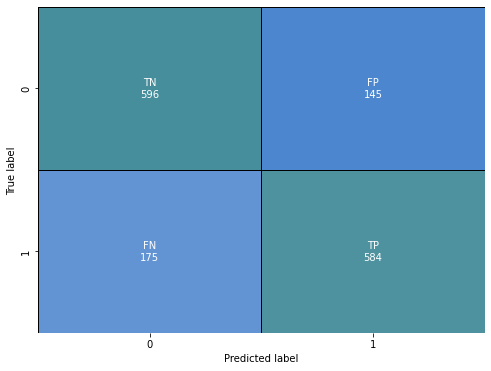

Precisão: 0.8010973936899863
Recall: 0.769433465085639
f1: 0.7849462365591398

---------------------------------------------------------

Matriz de confusão teste:



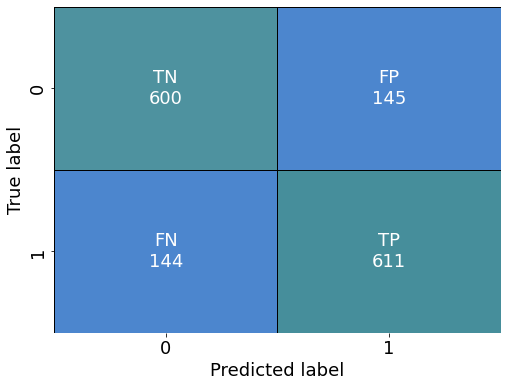

Precisão: 0.8082010582010583
Recall: 0.8092715231788079
f1: 0.8087359364659166


In [9]:
# Função para plot da matriz de confusão
def matriz_confusao(confusion):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in confusion.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(8,6))
    cmap = sns.diverging_palette(250, 210, l=55, as_cmap=True)
    sns.heatmap(confusion, annot=labels, fmt='', cmap=cmap, cbar=False, linecolor='black', linewidths=1.0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams.update({'font.size': 18})
    return plt.show()

# Matrizes de confusão e métricas para validação e teste com ponto de corte = 0,5
pred_val = (model.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
confusion_val = confusion_matrix(y_val, pred_val)
print(f"Matriz de confusão validação:\n")
matriz_confusao(confusion_val)
precision_val = precision_score(y_val, pred_val, average='binary')
recall_val = recall_score(y_val, pred_val, average='binary')
f1_val = f1_score(y_val, pred_val, average='binary')
print(f"Precisão: {precision_val}")
print(f"Recall: {recall_val}")
print(f"f1: {f1_val}")

print('\n---------------------------------------------------------\n')

pred_test = (model.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
confusion_test = confusion_matrix(y_test, pred_test)
print(f"Matriz de confusão teste:\n")
matriz_confusao(confusion_test)
precision_test = precision_score(y_test, pred_test, average='binary')
recall_test = recall_score(y_test, pred_test, average='binary')
f1_test = f1_score(y_test, pred_test, average='binary')
print(f"Precisão: {precision_test}")
print(f"Recall: {recall_test}")
print(f"f1: {f1_test}")

### Hyperparameters Tuning

In [10]:
# Parâmetros para tunning
params = {'criterion' :['gini', 'entropy'],
         'splitter': ['best', 'random'],
         'max_features': ['auto', 'sqrt', 'log2'],
         'ccp_alpha': [0, 0.1, 0.01, 0.001],
         'max_depth' : range(2, 102, 2),
         'min_samples_leaf': range(2, 102, 2),
         }

# Definição do cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Busca dos parâmetros usando RandomizedSearchCV
random_search = RandomizedSearchCV(model, params, n_iter=5000, scoring='roc_auc', verbose=1, n_jobs=-1, cv=cv, random_state=42)
result = random_search.fit(X_train, y_train)
print(f"Best params: {result.best_params_}")
print(f"Best score: {result.best_score_}")

Fitting 30 folds for each of 5000 candidates, totalling 150000 fits
Best params: {'splitter': 'best', 'min_samples_leaf': 22, 'max_features': 'auto', 'max_depth': 14, 'criterion': 'gini', 'ccp_alpha': 0}
Best score: 0.8499974447803373


In [11]:
# Modelo com os melhores parâmetros
model_dtt = DecisionTreeClassifier(**result.best_params_, random_state=42).fit(X_train, y_train)

# Métricas de desempenho nos conjuntos de validação e teste
prob_train = model_dtt.predict_proba(X_train)[:, 1]
prob_val = model_dtt.predict_proba(X_val)[:, 1]
prob_test = model_dtt.predict_proba(X_test)[:, 1]
print(f"AUC train: {metrics.roc_auc_score(y_train, prob_train)}")
print(f"AUC val: {metrics.roc_auc_score(y_val, prob_val)}")
print(f"AUC test: {metrics.roc_auc_score(y_test, prob_test)}")

AUC train: 0.9220622243396478
AUC val: 0.8354029646935826
AUC test: 0.8627236766078493


Matriz de confusão validação:



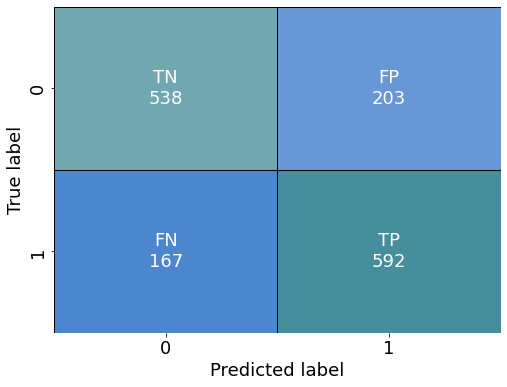

Precisão: 0.7446540880503144
Recall: 0.7799736495388669
f1: 0.7619047619047618

---------------------------------------------------------

Matriz de confusão teste:



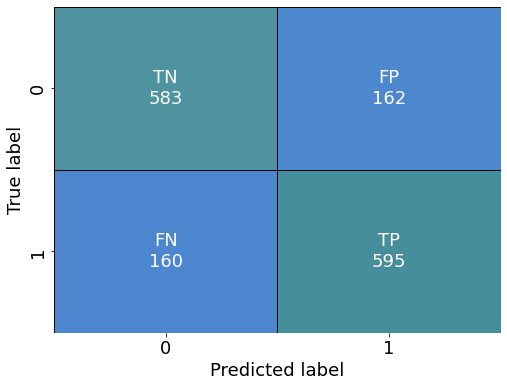

Precisão: 0.7859973579920739
Recall: 0.7880794701986755
f1: 0.787037037037037


In [12]:
# Matrizes de confusão e métricas para validação e teste com ponto de corte = 0,5
pred_val = (model_dtt.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
confusion_val = confusion_matrix(y_val, pred_val)
print(f"Matriz de confusão validação:\n")
matriz_confusao(confusion_val)
precision_val = precision_score(y_val, pred_val, average='binary')
recall_val = recall_score(y_val, pred_val, average='binary')
f1_val = f1_score(y_val, pred_val, average='binary')
print(f"Precisão: {precision_val}")
print(f"Recall: {recall_val}")
print(f"f1: {f1_val}")

print('\n---------------------------------------------------------\n')

pred_test = (model_dtt.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
confusion_test = confusion_matrix(y_test, pred_test)
print(f"Matriz de confusão teste:\n")
matriz_confusao(confusion_test)
precision_test = precision_score(y_test, pred_test, average='binary')
recall_test = recall_score(y_test, pred_test, average='binary')
f1_test = f1_score(y_test, pred_test, average='binary')
print(f"Precisão: {precision_test}")
print(f"Recall: {recall_test}")
print(f"f1: {f1_test}")

## Implementação do método Bagging

In [13]:
# Definindo modelo com bagging considerando o estimator o modelo com tunning
model_bg = BaggingClassifier(model_dtt)

# Definição do cross-validation usando RepeatedStratifiiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model_bg, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

# Verificando as métricas obtidas em diferentes partições e o desvio padrão
print(f'AUC, std: {mean(n_scores)}, {std(n_scores)}')

AUC, std: 0.9498236524396765, 0.0062056283120256765


In [14]:
# Ajuste do modelo bagging
model_bg.fit(X_train, y_train)

# Métricas de desempenho nos conjuntos de validação e teste
prob_train = model_bg.predict_proba(X_train)[:, 1]
prob_val = model_bg.predict_proba(X_val)[:, 1]
prob_test = model_bg.predict_proba(X_test)[:, 1]
print(f"AUC train: {metrics.roc_auc_score(y_train, prob_train)}")
print(f"AUC val: {metrics.roc_auc_score(y_val, prob_val)}")
print(f"AUC test: {metrics.roc_auc_score(y_test, prob_test)}")

AUC train: 0.9785826172055491
AUC val: 0.950015913402641
AUC test: 0.9469451975643361


Matriz de confusão validação:



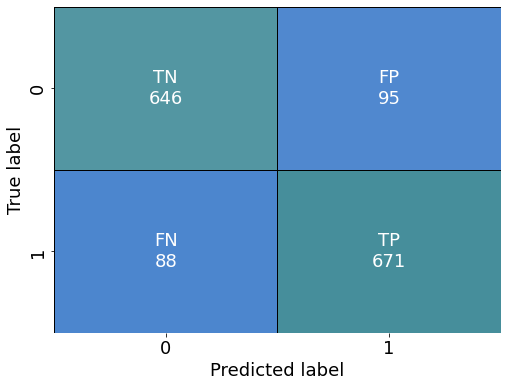

Precisão: 0.8759791122715405
Recall: 0.8840579710144928
f1: 0.88

---------------------------------------------------------

Matriz de confusão teste:



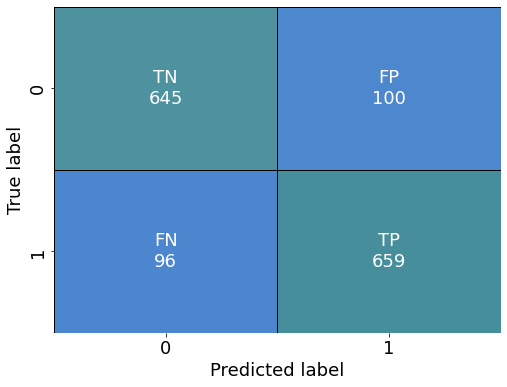

Precisão: 0.8682476943346509
Recall: 0.8728476821192053
f1: 0.8705416116248348


In [15]:
# Matrizes de confusão e métricas para validação e teste com ponto de corte = 0,5
pred_val = (model_bg.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
confusion_val = confusion_matrix(y_val, pred_val)
print(f"Matriz de confusão validação:\n")
matriz_confusao(confusion_val)
precision_val = precision_score(y_val, pred_val, average='binary')
recall_val = recall_score(y_val, pred_val, average='binary')
f1_val = f1_score(y_val, pred_val, average='binary')
print(f"Precisão: {precision_val}")
print(f"Recall: {recall_val}")
print(f"f1: {f1_val}")

print('\n---------------------------------------------------------\n')

pred_test = (model_bg.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
confusion_test = confusion_matrix(y_test, pred_test)
print(f"Matriz de confusão teste:\n")
matriz_confusao(confusion_test)
precision_test = precision_score(y_test, pred_test, average='binary')
recall_test = recall_score(y_test, pred_test, average='binary')
f1_test = f1_score(y_test, pred_test, average='binary')
print(f"Precisão: {precision_test}")
print(f"Recall: {recall_test}")
print(f"f1: {f1_test}")

### Bagging Hyperparameters Tuning

#### Variação do desempenho e variância do método de bagging de acordo com o número de árvores

('10', 0.948850648651928, 0.0077281037502105465)
('50', 0.9666627430192385, 0.006453458660455767)
('100', 0.9687202135552544, 0.006717581499703433)
('500', 0.9698682815029926, 0.006473688698578893)
('1000', 0.9702925490339295, 0.006346927725982877)
('5000', 0.9704101492427302, 0.006415698984393318)


Text(0.5, 0, 'Número de árvores')

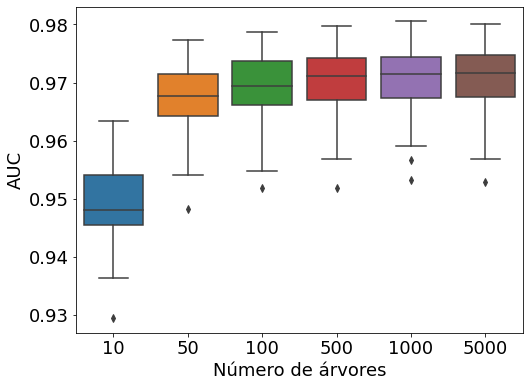

In [16]:
# Função para obter uma lista de modelos com diferentes qtds de arvores
def get_models():
    models = dict()
    # Define o número de árvores a serem consideradas no modelo
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models

# Função para avaliar um modelo usando cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

models = get_models()

# Listas para armazenar os resultados
results = []
names = []

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name, mean(scores), std(scores)}')
    
# Visualização da avaliação dos modelos variando o número de árvores
plt.figure(figsize=(8,6))
sns.boxplot(data=results)
plt.xticks(range(6), names)
plt.ylabel('AUC')
plt.xlabel('Número de árvores')

#### Variação do desempenho e variância do método de bagging de acordo com o quantidade de samples

('0.1', 0.9112557622314624, 0.0116784292689034)
('0.2', 0.927067775028075, 0.008348175020867286)
('0.3', 0.9352722149874816, 0.007605398820300605)
('0.4', 0.939683084745485, 0.008621979180783609)
('0.5', 0.9414739528555861, 0.0075989780934380335)
('0.6', 0.9431404544652545, 0.00847920385824241)
('0.7', 0.9463037239213572, 0.006855152817631992)
('0.8', 0.9463699227927228, 0.008596823555384686)
('0.9', 0.9472591573849239, 0.006562350129357358)
('1.0', 0.9469980904864905, 0.007345983345481466)


Text(0.5, 0, 'Número de amostras')

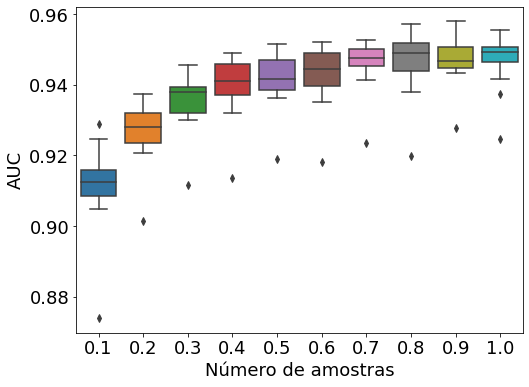

In [17]:
# Função para obter uma lista de modelos com diferentes qtds de amostras
def get_models():
    models = dict()
    # Varia a quantidade de amostras de 10% a 100% dos exemplos
    n_samples = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for i in n_samples:
        models[f'{i}'] = BaggingClassifier(max_samples=i)
    return models

# Função para avaliar um modelo usando cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

models = get_models()

# Listas para armazenar os resultados
results = []
names = []

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name, mean(scores), std(scores)}')
    
# Visualização da avaliação dos modelos variando o número de árvores
plt.figure(figsize=(8,6))
sns.boxplot(data=results)
plt.xticks(range(10), names)
plt.ylabel('AUC')
plt.xlabel('Número de amostras')

#### Bagging hyperparameters tunning

In [21]:
params = {'n_estimators' :[10, 50, 100, 500, 1000],
          'max_samples': arange(0.1, 1.1, 0.1),
          'bootstrap': [False, True],
          'warm_start': [False, True],
          }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(model_bg, params, n_iter=50, scoring='roc_auc', verbose=1, n_jobs=-1, cv=cv, random_state=42)
result = random_search.fit(X_train, y_train)
print(f"Best params: {result.best_params_}")
print(f"Best score: {result.best_score_}")

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Best params: {'warm_start': False, 'n_estimators': 500, 'max_samples': 0.9, 'bootstrap': False}
Best score: 0.9657045128389039


In [22]:
# Ajuste do modelo bagging
model_bgt = BaggingClassifier(**result.best_params_, random_state=42).fit(X_train, y_train)

# Métricas de desempenho nos conjuntos de validação e teste
prob_train = model_bgt.predict_proba(X_train)[:, 1]
prob_val = model_bgt.predict_proba(X_val)[:, 1]
prob_test = model_bgt.predict_proba(X_test)[:, 1]
print(f"AUC train: {metrics.roc_auc_score(y_train, prob_train)}")
print(f"AUC val: {metrics.roc_auc_score(y_val, prob_val)}")
print(f"AUC test: {metrics.roc_auc_score(y_test, prob_test)}")

AUC train: 1.0
AUC val: 0.9548263838881688
AUC test: 0.9591581848082137


Matriz de confusão validação:



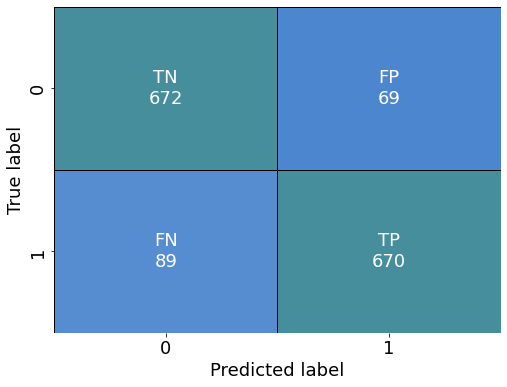

Precisão: 0.9066305818673883
Recall: 0.8827404479578392
f1: 0.8945260347129504

---------------------------------------------------------

Matriz de confusão teste:



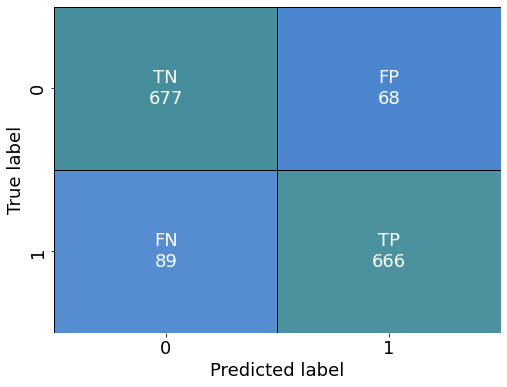

Precisão: 0.9073569482288828
Recall: 0.8821192052980132
f1: 0.8945601074546675


In [23]:
# Matrizes de confusão e métricas para validação e teste com ponto de corte = 0,5
pred_val = (model_bgt.predict_proba(X_val)[:,1] >= 0.5).astype(bool)
confusion_val = confusion_matrix(y_val, pred_val)
print(f"Matriz de confusão validação:\n")
matriz_confusao(confusion_val)
precision_val = precision_score(y_val, pred_val, average='binary')
recall_val = recall_score(y_val, pred_val, average='binary')
f1_val = f1_score(y_val, pred_val, average='binary')
print(f"Precisão: {precision_val}")
print(f"Recall: {recall_val}")
print(f"f1: {f1_val}")

print('\n---------------------------------------------------------\n')

pred_test = (model_bgt.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
confusion_test = confusion_matrix(y_test, pred_test)
print(f"Matriz de confusão teste:\n")
matriz_confusao(confusion_test)
precision_test = precision_score(y_test, pred_test, average='binary')
recall_test = recall_score(y_test, pred_test, average='binary')
f1_test = f1_score(y_test, pred_test, average='binary')
print(f"Precisão: {precision_test}")
print(f"Recall: {recall_test}")
print(f"f1: {f1_test}")